## CS-E4820 Machine Learning: Advanced Probabilistic Methods (spring 2021)

Pekka Marttinen, Santosh Hiremath, Tianyu Cui, Yogesh Kumar, Zheyang Shen, Alexander Aushev, Khaoula El Mekkaoui, Shaoxiong Ji, Alexander Nikitin, Sebastiaan De Peuter, Joakim Järvinen.

## Exercise 1, due on Tuesday 26th January at 23:00.

#### Contents
1. Problem 1: Coins
2. Problem 2: False positive paradox
3. Problem 3: Markov blanket definition

## Problem 1: Coins

There are two bent coins ($c_1$ and $c_2$) with different properties, and your objective is to guess which coin was used (i.e. the value of random variable $C \in \{c_1, c_2\}$), after learning whether the result of the coin toss (i.e. the random variable $X \in \{\mbox{h}, \mbox{t}\}$) was heads or tails.

As prior knowledge, we know the probability of each coin resulting in tails: $p(X=\mbox{t} \mid C=c_1) = \theta_1$ and $p(X=\mbox{t} \mid C=c_2) = \theta_2$.
In addition, the prior probability for using coin $c_1$ is known: $p(C=c_1) = \pi_1$.

Give the posterior probability of coin $c_1$ being used for the toss, $p(C=c_1 \mid X)$, in terms of $\theta_1$, $\theta_2$ and $\pi_1$, for both $X=\mbox{t}$ and $X=\mbox{h}$.

Furthermore, plot the posterior probability of coin $c_1$, $p(C=c_1 \mid X=\mbox{t})$, as a function of $\theta_1$, when we have $\theta_2 = 0.5$ and $\pi_1 = 0.5$.


Write your solutions in LateX or attach a picture in the answer cell provided below. You can add a picture using the command ```!(imagename_in_the_folder.jpg)```. Latex in here works similarly as you would write it normally! You can use some of the definitions from the exercise description as a reference. The list of valid Latex commands in Jypyter notebook can be found here: http://www.onemathematicalcat.org/MathJaxDocumentation/TeXSyntax.htm



### Solution:
In this exercise for simplicity we will use $p(x)$ for expressing $p(X=x)$. 

With the given information we can extract that,

$$p(c_1) = \pi_1,\;\;\; p(c_2) = 1-p(c_1) = 1 - \pi_1.$$


We also know that,

$$p(\textrm{t}|c_1) = \frac{p(\textrm{t},c_1)}{p(c_1)} = \theta_1,$$

$$p(\textrm{t}|c_2) = \frac{p(\textrm{t},c_2)}{p(c_2)} = \theta_2.$$


Therefore,

$$p(\textrm{t},c_1) = \theta_1p(c_1) = \theta_1\pi_1,$$

$$p(\textrm{t},c_2) = \theta_2p(c_2) = \theta_2(1-\pi_1).$$

And we want to obtain,

$$p(c_1|\textrm{t}) = \frac{p(\textrm{t},c_1)}{p(\textrm{t})}, \;\;\; p(c_1|\textrm{h}) = \frac{p(\textrm{h},c_1)}{p(\textrm{h})}.$$

We can obtain that,

$$p(\textrm{t}) = p(\textrm{t},c_1) + p(\textrm{t},c_2) = \theta_1\pi_1 + \theta_2(1-\pi_1)$$

$$p(\textrm{h}) = 1-p(t) = 1 - (\theta_1\pi_1 + \theta_2(1-\pi_1))$$

and 

$$p(\textrm{t},c_1) = \theta_1\pi_1$$

$$p(\textrm{h},c_1) = \pi_1 - \theta_1\pi_1 = (1-\theta_1)\pi_1$$

Hence,

$$p(c_1|\textrm{t}) = \frac{p(\textrm{t},c_1)}{p(\textrm{t})} = \frac{\theta_1\pi_1}{\theta_1\pi_1 + \theta_2(1-\pi_1)}$$

$$p(c_1|\textrm{h}) = \frac{p(\textrm{h},c_1)}{p(\textrm{h})} = \frac{(1-\theta_1)\pi_1}{1 - (\theta_1\pi_1 + \theta_2(1-\pi_1))}$$

|       | h | t | total |
| :-: | :-: | :-: | :-: |
| $\mathbf{c_1}$ | $$(1-\theta_1)\pi_1$$ | $$\theta_1\pi_1$$ | $\pi_1$  |
| $\mathbf{c_2}$ | $$(1-\theta_2)(1-\pi_1)$$ | $$\theta_2(1-\pi_1)$$ | $$1-\pi_1$$|
| $\mathbf{total}$ | $$1 - (\theta_1\pi_1 + \theta_2(1-\pi_1))$$ | $$\theta_1\pi_1 + \theta_2(1-\pi_1)$$ | 1

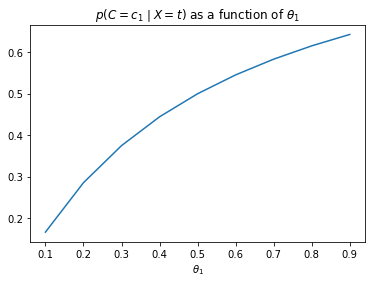

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# define some variables:
theta_2 = 0.5
pi_1 = 0.5

# compute posterior probability of c_1
theta_1 = np.arange(0.1, 1.0, 0.1) # choose a reasonable range
post_c1 = [(thet1*pi_1)/(thet1*pi_1+theta_2*(1-pi_1)) for thet1 in theta_1] # posterior

# plot the result
plt.plot(theta_1, post_c1)
plt.title('$p(C = c_1 \\mid X = t)$ as a function of $\\theta_1$')
plt.xlabel('$\\theta_1$')
plt.show()

## Problem 2: False positive paradox

Consider a hypothetical lie detector that is ''fairly reliable'', in the sense that it will correctly detect 98\% of all lies, and also classify as true 98\% of all statements that are actually true.
This lie detector is being used in an attempt to detect academic dishonesty, by asking ''did you cheat?'' from all students participating in an exam of a machine learning course.
(This example is still hypothetical.)

For the purposes of this question, assume as prior knowledge that there are 300 students taking the exam, and a single student has chosen to cheat.
We will further assume that all students deny having cheated. 
If the detector now flags a particular student X as a cheater, how likely is it that X has, in fact, cheated in the exam?

Write your solutions in LateX or attach a picture in the answer cell provided below. 




### Solution:

When the actual cheater goes through the test, the probability that is detected as a cheater is 0,98.

But at the same time when any of the other 299 students goes through the test there is a probability of 0,02 that is classified as the cheater. So there will be $299\times0.02 = 5,98$ false positives.

So the probability of obtaining a true positive is in fact $\frac{0,98}{5,98+0,98} = 0,140804598$.

## Problem 3: Markov blanket definition
Consider the Bayesian network in below. What is the Markov blanket of each variable? (see Barber: [Bayesian Reasoning and Machine Learning](http://web4.cs.ucl.ac.uk/staff/D.Barber/pmwiki/pmwiki.php?n=Brml.Online), ch. 2.1, Definition 2.5)

![](markov.png)
Define Markov blanket for each variable $A,B,C,D,E,F$. You answer should list the nodes that form the Markov blanket for each node. For example, for node A, your answer should look like so $A = \{B, D, E\}$

### Solution:

$A = \{ B,C,D,F\}$ 

$B = \{ A,C,D,E,F\}$

$C = \{ A,B,D\}$

$D = \{ A,B,C,E,F\}$

$E = \{ B,D,F\}$

$F = \{ A,B,D,E\}$